# Make some error ellipses

In [1]:
# load some fisher matrices

sigmaBins2_01_lin,FoMPropBins2_01_lin,paramList2_01_lin,FijBins2_01_lin, \
    sigmaBins2_01g_lin,FoMPropBins2_01g_lin,paramList2_01g_lin,FijBins2_01g_lin = np.load('KZlimited_gold_lin_k1_wa1_median.npy')
sigmaBins2_02_lin,FoMPropBins2_02_lin,paramList2_02_lin,FijBins2_02_lin, \
    sigmaBins2_02g_lin,FoMPropBins2_02g_lin,paramList2_02g_lin,FijBins2_02g_lin = np.load('KZlimited_gold_lin_k2_wa1_median.npy')
sigmaBins4_01_lin,FoMPropBins4_01_lin,paramList4_01_lin,FijBins4_01_lin, \
    sigmaBins4_01g_lin,FoMPropBins4_01g_lin,paramList4_01g_lin,FijBins4_01g_lin = np.load('KZlimited_opti_lin_k1_wa1_median.npy')
sigmaBins4_02_lin,FoMPropBins4_02_lin,paramList4_02_lin,FijBins4_02_lin, \
    sigmaBins4_02g_lin,FoMPropBins4_02g_lin,paramList4_02g_lin,FijBins4_02g_lin = np.load('KZlimited_opti_lin_k2_wa1_median.npy')
    
sigmaBins2_01_nln,FoMPropBins2_01_nln,paramList2_01_nln,FijBins2_01_nln, \
    sigmaBins2_01g_nln,FoMPropBins2_01g_nln,paramList2_01g_nln,FijBins2_01g_nln = np.load('KZlimited_gold_nln_k1_wa1_median.npy')
sigmaBins2_02_nln,FoMPropBins2_02_nln,paramList2_02_nln,FijBins2_02_nln, \
    sigmaBins2_02g_nln,FoMPropBins2_02g_nln,paramList2_02g_nln,FijBins2_02g_nln = np.load('KZlimited_gold_nln_k2_wa1_median.npy')
sigmaBins4_01_nln,FoMPropBins4_01_nln,paramList4_01_nln,FijBins4_01_nln, \
    sigmaBins4_01g_nln,FoMPropBins4_01g_nln,paramList4_01g_nln,FijBins4_01g_nln = np.load('KZlimited_opti_nln_k1_wa1_median.npy')
sigmaBins4_02_nln,FoMPropBins4_02_nln,paramList4_02_nln,FijBins4_02_nln, \
    sigmaBins4_02g_nln,FoMPropBins4_02g_nln,paramList4_02g_nln,FijBins4_02g_nln = np.load('KZlimited_opti_nln_k2_wa1_median.npy')
  
print 'done.'

done.


In [2]:
# extract z=7 end of lists
Fij_gold_lin_k1 = FijBins2_01_lin[-1]
Fij_gold_lin_k2 = FijBins2_02_lin[-1]
Fij_opti_lin_k1 = FijBins4_01_lin[-1]
Fij_opti_lin_k2 = FijBins4_02_lin[-1]
Fij_gold_nln_k1 = FijBins2_01_nln[-1]
Fij_gold_nln_k2 = FijBins2_02_nln[-1]
Fij_opti_nln_k1 = FijBins4_01_nln[-1]
Fij_opti_nln_k2 = FijBins4_02_nln[-1]
print Fij_gold_lin_k1.shape,Fij_gold_lin_k2.shape,Fij_opti_lin_k1.shape,Fij_opti_lin_k2.shape
print Fij_gold_nln_k1.shape,Fij_gold_nln_k2.shape,Fij_opti_nln_k1.shape,Fij_opti_nln_k2.shape

(24, 24) (24, 24) (24, 24) (24, 24)
(24, 24) (24, 24) (24, 24) (24, 24)


In [3]:
print len(Fij_gold_lin_k1), len(FijBins2_01_lin)

24 15


In [4]:
# Fix mnu
# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)

mnuIndex = 6
Fij_gold_lin_k1_nmn = fixParam(Fij_gold_lin_k1,mnuIndex)
Fij_gold_lin_k2_nmn = fixParam(Fij_gold_lin_k2,mnuIndex)
Fij_opti_lin_k1_nmn = fixParam(Fij_opti_lin_k1,mnuIndex)
Fij_opti_lin_k2_nmn = fixParam(Fij_opti_lin_k2,mnuIndex)
Fij_gold_nln_k1_nmn = fixParam(Fij_gold_nln_k1,mnuIndex)
Fij_gold_nln_k2_nmn = fixParam(Fij_gold_nln_k2,mnuIndex)
Fij_opti_nln_k1_nmn = fixParam(Fij_opti_nln_k1,mnuIndex)
Fij_opti_nln_k2_nmn = fixParam(Fij_opti_nln_k2,mnuIndex)

print 'done.'

done.


In [5]:
# from: https://github.com/damonge/GoFish/blob/master/fisher_plot.py
# I'm not running this code.  It is here because it is what I copied from.

import numpy as np
import os as os
import sys as sys
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import copy

FS=16

class ParamFisher:
    """ Fisher matrix parameter """
    val=0.0
    dval=0.0
    prior=0.0
    onesided=0
    name="str"
    label="$x$"
    isfree=False
    do_plot=True

    def __init__(self,val,dval,prior,name,label,isfree,do_plot,onesided):
        self.val=val
        self.dval=dval
        self.prior=prior
        self.name=name
        self.label=label
        self.isfree=isfree
        self.do_plot=do_plot
        self.onesided=onesided

def find_param(param_list,name):
    index=0
    for par in param_list:
        if par.name==name :
            return index
        index+=1
    sys.exit("No parameter "+name)

def plot_fisher_single(params,name,fishermat,ax,fc,lw,ls,lc,fact_axis,show_title=True, legend=False, labels=[], unit="") :
    nb=128

    sigma_max=0
    i1=find_param(params,name)
    for i in np.arange(len(fishermat)) :
        covar_full=np.linalg.inv(fishermat[i])
        sigma=np.sqrt(covar_full[i1,i1])
        if sigma>=sigma_max :
            sigma_max=sigma
        x_arr=params[i1].val-4*sigma+8*sigma*np.arange(nb)/(nb-1.)
        p_arr=np.exp(-(x_arr-params[i1].val)**2/(2*sigma**2))
        if labels != []:
            ax.plot(x_arr,p_arr,color=lc[i],linestyle=ls[i],linewidth=lw[i], label=labels[i])
        else:
            ax.plot(x_arr,p_arr,color=lc[i],linestyle=ls[i],linewidth=lw[i])
    if show_title:
        ax.set_title("$\\sigma($"+params[i1].label+"$)=%.3lf$"%sigma)
    ax.set_xlim([params[i1].val-fact_axis*sigma_max,params[i1].val+fact_axis*sigma_max])
    ax.set_xlabel(params[i1].label + " " + unit,fontsize=FS)
    for label in ax.get_yticklabels():
        label.set_fontsize(FS-2)
    for label in ax.get_xticklabels():
        label.set_fontsize(FS-2)
    

def plot_fisher_two(params,name1,name2,fishermat,ax,fc,lw,ls,lc,fact_axis,plot_2s=True, units=['','']) :
    sig0_max=0
    sig1_max=0
    i1=find_param(params,name1)
    i2=find_param(params,name2)
    for i in np.arange(len(fishermat)) :
        covar_full=np.linalg.inv(fishermat[i])
        covar=np.zeros([2,2])
        covar[0,0]=covar_full[i1,i1]
        covar[0,1]=covar_full[i1,i2]
        covar[1,0]=covar_full[i2,i1]
        covar[1,1]=covar_full[i2,i2]
        sig0=np.sqrt(covar[0,0])
        sig1=np.sqrt(covar[1,1])

        if sig0>=sig0_max :
            sig0_max=sig0
        if sig1>=sig1_max :
            sig1_max=sig1

        w,v=np.linalg.eigh(covar)
        angle=180*np.arctan2(v[1,0],v[0,0])/np.pi
        a_1s=np.sqrt(2.3*w[0])
        b_1s=np.sqrt(2.3*w[1])
        a_2s=np.sqrt(6.17*w[0])
        b_2s=np.sqrt(6.17*w[1])

        centre=np.array([params[i1].val,params[i2].val])

        e_1s=Ellipse(xy=centre,width=2*a_1s,height=2*b_1s,angle=angle,
                     # facecolor=fc[i],linewidth=lw[i],linestyle="solid",edgecolor=lc[i])
                    facecolor=fc[i],linewidth=lw[i],linestyle=ls[i],edgecolor=lc[i])
        e_2s=Ellipse(xy=centre,width=2*a_2s,height=2*b_2s,angle=angle,
                     facecolor=fc[i],linewidth=lw[i]/2.,linestyle="dashed",edgecolor=lc[i])
                    # facecolor=fc[i],linewidth=lw[i],linestyle=ls[i],edgecolor=lc[i])

        if plot_2s:
            ax.add_artist(e_2s)
        ax.add_artist(e_1s)
        ax.set_xlim([params[i1].val-fact_axis*sig0_max,
                     params[i1].val+fact_axis*sig0_max])
        ax.set_ylim([params[i2].val-fact_axis*sig1_max,
                     params[i2].val+fact_axis*sig1_max])
        ax.set_xlabel(params[i1].label + ' ' + units[0],fontsize=FS)
        ax.set_ylabel(params[i2].label + ' ' + units[1],fontsize=FS)
    for label in ax.get_yticklabels():
        label.set_fontsize(FS-2)
    for label in ax.get_xticklabels():
        label.set_fontsize(FS-2)

def plot_fisher_all(params, #Parameters in the FMs
                    fishermat, #FMs to plot
                    fc,lw,ls,lc, #Foreground colors, line widths, line styles and line colours for each FM
                    labels, #Labels for each FM
                    fact_axis, #The x and y axes will be fact_axis x error in each parameter
                    fname) : #File to save the plot
    index_plot=np.where(np.array([p.do_plot for p in params]))
    n_params=len(index_plot[0])
    param_plot=params[index_plot]

    fig=plt.figure(figsize=(10,9))
    plt.subplots_adjust(hspace=0,wspace=0)
    for i in np.arange(n_params) : #Plot pdfs and ellipses
        i_col=i
        for j in np.arange(n_params-i)+i :
            i_row=j
            iplot=i_col+n_params*i_row+1

            ax=fig.add_subplot(n_params,n_params,iplot)
            if i==j :
                plot_fisher_single(params,param_plot[i].name,fishermat,
                                   ax,fc,lw,ls,lc,fact_axis)
            else :
                plot_fisher_two(params,param_plot[i].name,param_plot[j].name,
                                fishermat,ax,fc,lw,ls,lc,fact_axis)

            if i_row!=n_params-1 :
                ax.get_xaxis().set_visible(False)

            if i_col!=0 :
                ax.get_yaxis().set_visible(False)

            if i_col==0 and i_row==0 :
                ax.get_yaxis().set_visible(False)
                
            ax.locator_params(nbins=6)

    if n_params>1 : #Add labels in a separate plot
        ax=fig.add_subplot(n_params,n_params,2)
        ax.set_xlim([-1,1])
        ax.set_ylim([-1,1])
        for i in np.arange(len(labels)) :
            ax.plot([-1,1],[-3,-3],color=lc[i],linestyle=ls[i],
                    linewidth=lw[i],label=labels[i])
        ax.legend(loc='upper left',frameon=False,fontsize=FS)
        ax.axis('off')

    if fname!="none" :
        plt.savefig(fname,bbox_inches='tight')

    plt.show()


In [6]:
# pare this down to the 2d version that I want to use
from matplotlib.patches import Ellipse

nCosParams = 9 # 6 LCDM + Mnu + w0 + wa
paramList = ['ombh2','omch2','cosmomc_theta',  'As', 'ns','tau','mnu', 'w', 'wa']
paramVals = [0.02226,0.1193 ,1.04087e-2   ,2.130e-9,0.9653,0.063,0.06,-0.95,0.0 ]
deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.010] #mnu one in eV


#def plot_fisher_two(params,name1,name2,fishermat,ax,fc,lw,ls,lc,fact_axis,plot_2s=True, units=['','']) :
def plot_fisher_two(paramIndex1,label1,paramIndex2,label2,paramVals,fishermat,ax,fc,lw,ls,lc,eLabels,fact_axis,fact_axis2,
                    plot_2s=True, units=['',''],FS=16,fill=False,handles=[]) :
    """
    Inputs:
        paramIndex1,paramIndex2: indices for the two parameters to use from fishermat
        label1,label2: xlabel,ylabel
        paramVals: fiducial values of the parameters
        fishermat: FMs to plot [list]
        fc,lw,ls,lc: Foreground colors, line widths, line styles and line colours for each FM [list]
        eLabels: labels for each ellipse [list]
        ##labels: Labels for each FM
        fact_axis,fact_axis2: The x and y axis plotting limits will be fact_axis x error in each parameter
        ##fname:  File to save the plot
    
        ax: from fig.add_subplot
        plot_2s: set to true to plot 2sigma countour as well as 1sigma
        units: units to put into axis labels
        FS: font size for axis labels
        fill: set to True to fill ellipses.  Default: False
        handles: for returning a list of handles for use in legend
    
    """
    # chi-square values for dof=24:
    # p-value = 0.3173: ~26.921  (found from linear interp. between p-val 0.025 at 28.241 and p-val 0.5 at 23.337)
    # p-value = 0.05: 36.415
    chisq1 = 26.921
    chisq2 = 36.415
    
    # default values from github
    chisq1 = 2.3
    chisq2 = 6.17
    
    sig0_max=0
    sig1_max=0
    i1=paramIndex1 #find_param(params,name1)
    i2=paramIndex2 #find_param(params,name2)
    for i in np.arange(len(fishermat)) :
        covar_full=np.linalg.inv(fishermat[i])
        covar=np.zeros([2,2])
        covar[0,0]=covar_full[i1,i1]
        covar[0,1]=covar_full[i1,i2]
        covar[1,0]=covar_full[i2,i1]
        covar[1,1]=covar_full[i2,i2]
        sig0=np.sqrt(covar[0,0])
        sig1=np.sqrt(covar[1,1])

        if sig0>=sig0_max :
            sig0_max=sig0
        if sig1>=sig1_max :
            sig1_max=sig1

        w,v=np.linalg.eigh(covar) # for a hermitian or symmetric matrix
        angle=180*np.arctan2(v[1,0],v[0,0])/np.pi
        a_1s=np.sqrt(chisq1*w[0])
        b_1s=np.sqrt(chisq1*w[1])
        a_2s=np.sqrt(chisq2*w[0])
        b_2s=np.sqrt(chisq2*w[1])

        #centre=np.array([params[i1].val,params[i2].val])
        centre=np.array([paramVals[i1],paramVals[i2]])

        e_1s=Ellipse(xy=centre,width=2*a_1s,height=2*b_1s,angle=angle,label=eLabels[i],
                     #facecolor=fc[i],linewidth=lw[i],linestyle="solid",edgecolor=lc[i],fill=fill)
                     facecolor=fc[i],linewidth=lw[i],linestyle=ls[i],edgecolor=lc[i],fill=fill)
        e_2s=Ellipse(xy=centre,width=2*a_2s,height=2*b_2s,angle=angle, #label=eLabels[i],
                     #facecolor=fc[i],linewidth=lw[i]/2.,linestyle="dashed",edgecolor=lc[i],fill=fill)
                     facecolor=fc[i],linewidth=lw[i],linestyle=ls[i],edgecolor=lc[i],fill=fill)

        if plot_2s:
            ax.add_artist(e_2s)
            handles.append(e_2s)
        ax.add_artist(e_1s)
        handles.append(e_1s)
        #ax.set_xlim([params[i1].val-fact_axis*sig0_max,
        #             params[i1].val+fact_axis*sig0_max])
        #ax.set_ylim([params[i2].val-fact_axis*sig1_max,
        #             params[i2].val+fact_axis*sig1_max])
        #ax.set_xlabel(params[i1].label + ' ' + units[0],fontsize=FS)
        #ax.set_ylabel(params[i2].label + ' ' + units[1],fontsize=FS)
        ax.set_xlim([paramVals[i1]-fact_axis*sig0_max,
                     paramVals[i1]+fact_axis*sig0_max])
        ax.set_ylim([paramVals[i2]-fact_axis2*sig1_max,
                     paramVals[i2]+fact_axis2*sig1_max])
        ax.set_xlabel(label1 + ' ' + units[0],fontsize=FS)
        ax.set_ylabel(label2 + ' ' + units[1],fontsize=FS)
    for label in ax.get_yticklabels():
        label.set_fontsize(FS-2)
    for label in ax.get_xticklabels():
        label.set_fontsize(FS-2)
        
        
print 'ok'        

ok


In [7]:
# for the fixed-mnu version
paramList2 = np.delete(paramList,mnuIndex)
paramVals2 = np.delete(paramVals,mnuIndex)
deltaP2    = np.delete(deltaP,   mnuIndex)

print 'done.'

done.


In [8]:
# set up some test arrays to use with this
fishermat_lin = [Fij_gold_lin_k1,Fij_gold_lin_k2,Fij_opti_lin_k1,Fij_opti_lin_k2]
fishermat_nln = [Fij_gold_nln_k1,Fij_gold_nln_k2,Fij_opti_nln_k1,Fij_opti_nln_k2]
fishermat_gold = [Fij_gold_lin_k1,Fij_gold_lin_k2,Fij_gold_nln_k1,Fij_gold_nln_k2]
fishermat_opti = [Fij_opti_lin_k1,Fij_opti_lin_k2,Fij_opti_nln_k1,Fij_opti_nln_k2]
fishermat_k1 = [Fij_gold_lin_k1,Fij_opti_lin_k1,Fij_gold_nln_k1,Fij_opti_nln_k1]
fishermat_k2 = [Fij_gold_lin_k2,Fij_opti_lin_k2,Fij_gold_nln_k2,Fij_opti_nln_k2]

# set colors, etc.
#fc = [None,None,None,None]
fc = ['b','c','r','y']
lw = [2,2,2,2]
ls = ['-','-','--','--']
lc = ['b','g','c','y']
eLabels = ['t','e','s','t']

paramIndex1 = 7; label1 = 'w0'
paramIndex2 = 8; label2 = 'wa'



print 'done.'

done.


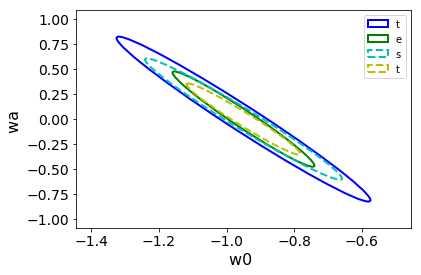

In [9]:
# try it

# call subplot with just one plot
fig, ax = plt.subplots()  
fact_axis = 2
#plot_2s = True
plot_2s = False
fishermat = fishermat_nln
paramIndex1 = 7; label1 = 'w0'
paramIndex2 = 8; label2 = 'wa'
handles = []

plot_fisher_two(paramIndex1,label1,paramIndex2,label2,paramVals,fishermat,ax,fc,lw,ls,lc,eLabels,fact_axis,fact_axis,
                    plot_2s=plot_2s, units=['',''],FS=16,handles=handles)
ax.legend(handles=handles)
plt.show()

In [10]:
# plot error ellipse from Tony's paper

tony_data = np.genfromtxt('LSST 1sigma w0wa.csv', delimiter=',')
tony_data_3x2pt = np.genfromtxt('LSST 1sigma w0wa 3x2pt.csv', delimiter=',')
print 'ok'

ok


In [11]:
# tack the first entry on to the end
tony_data = np.append(tony_data,[tony_data[0]],axis=0)
tony_data_3x2pt = np.append(tony_data_3x2pt,[tony_data_3x2pt[0]],axis=0)

print tony_data
print tony_data_3x2pt

[[-1.21165049  0.49709302]
 [-1.21035599  0.50290698]
 [-1.20647249  0.50290698]
 [-1.2012945   0.5       ]
 [-1.19093851  0.48546512]
 [-1.17928803  0.46802326]
 [-1.15469256  0.4244186 ]
 [-1.12491909  0.36627907]
 [-1.08867314  0.2877907 ]
 [-1.06537217  0.23837209]
 [-1.0394822   0.18023256]
 [-1.01229773  0.11918605]
 [-0.96957929  0.01744186]
 [-0.93462783 -0.06686047]
 [-0.89449838 -0.16860465]
 [-0.85954693 -0.26162791]
 [-0.83365696 -0.33430233]
 [-0.81423948 -0.39244186]
 [-0.8038835  -0.4244186 ]
 [-0.797411   -0.44767442]
 [-0.79223301 -0.47093023]
 [-0.78964401 -0.49127907]
 [-0.79093851 -0.5       ]
 [-0.797411   -0.5       ]
 [-0.80906149 -0.48546512]
 [-0.81812298 -0.47093023]
 [-0.83883495 -0.43604651]
 [-0.86860841 -0.37790698]
 [-0.89838188 -0.31686047]
 [-0.94498382 -0.21511628]
 [-0.98252427 -0.13081395]
 [-1.01488673 -0.05523256]
 [-1.04724919  0.02325581]
 [-1.07572816  0.09302326]
 [-1.10938511  0.18023256]
 [-1.14304207  0.26744186]
 [-1.17152104  0.34883721]
 

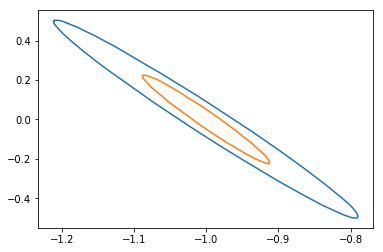

In [12]:
plt.plot(tony_data[:,0],tony_data[:,1])
plt.plot(tony_data_3x2pt[:,0],tony_data_3x2pt[:,1])

plt.show()

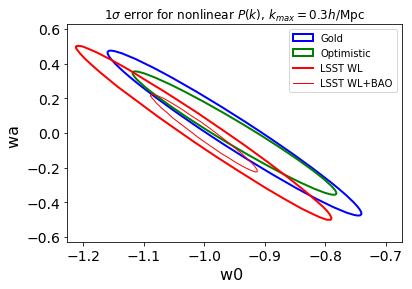

In [13]:
# try it

# call subplot with just one plot
fig, ax = plt.subplots()  
fact_axis = 2
#plot_2s = True
plot_2s = False
#fishermat = fishermat_nln
fishermat = [Fij_gold_nln_k2,Fij_opti_nln_k2] # nln k2
paramIndex1 = 7; label1 = 'w0'
paramIndex2 = 8; label2 = 'wa'
eLabels[0] = 'Gold'
eLabels[1] = 'Optimistic'
handles=[]

plot_fisher_two(paramIndex1,label1,paramIndex2,label2,paramVals,fishermat,ax,fc,lw,ls,lc,eLabels,fact_axis,fact_axis,
                    plot_2s=plot_2s, units=['',''],FS=16,handles=handles)
thandle, = ax.plot(tony_data[:,0],tony_data[:,1],linewidth=2,color='r',label='LSST WL') 
thandle2, = ax.plot(tony_data_3x2pt[:,0],tony_data_3x2pt[:,1],linewidth=1,color='r',label='LSST WL+BAO') 
# the handle doesn't work without the comma
handles.append(thandle)
handles.append(thandle2)
ax.legend(handles=handles)
plt.title(r'$1\sigma$ error for nonlinear $P(k)$, $k_{max} = 0.3 h/$Mpc')
plt.show()

In [20]:
# try it
# now with better line widths, colors
%matplotlib qt
#%matplotlib inline

# set colors, etc.
#fc = ['b','g','c','y']
lw = [2,2,2,2]
ls = ['-.','-','--','--']
lc = ['b','g','c','y']
eLabels = ['t','e','s','t']


# call subplot with just one plot
fig, ax = plt.subplots()  
fact_axis = 2
#plot_2s = True
plot_2s = False
#fishermat = fishermat_nln
fishermat = [Fij_gold_nln_k2,Fij_opti_nln_k2] # nln k2
paramIndex1 = 7; label1 = r'$w_0$'
paramIndex2 = 8; label2 = r'$w_a$'
eLabels[0] = r'Gold $\kappa g$'
eLabels[1] = r'Optimistic $\kappa g$'
handles=[]

plot_fisher_two(paramIndex1,label1,paramIndex2,label2,paramVals,fishermat,ax,fc,lw,ls,lc,eLabels,fact_axis,fact_axis,
                    plot_2s=plot_2s, units=['',''],FS=16,handles=handles)
thandle, = ax.plot(tony_data[:,0],tony_data[:,1],linewidth=1,color='r',label='LSST WL',linestyle='-') 
thandle2, = ax.plot(tony_data_3x2pt[:,0],tony_data_3x2pt[:,1],linewidth=2,color='k',label='LSST WL+BAO',linestyle='--') 
# the handle doesn't work without the comma
handles.append(thandle)
handles.append(thandle2)
ax.legend(handles=handles)
plt.title(r'$1\sigma$ error for nonlinear $P(k)$, $k_{max} = 0.3 h/$Mpc',fontsize=15)
plt.show()

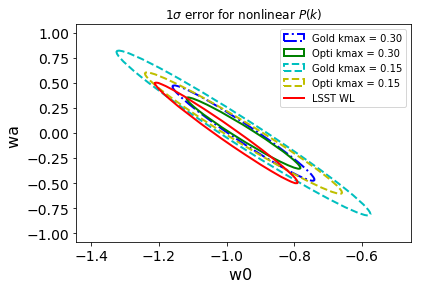

In [15]:
# try it

# call subplot with just one plot
fig, ax = plt.subplots()  
fact_axis = 2
#plot_2s = True
plot_2s = False
#fishermat = fishermat_nln
fishermat = [Fij_gold_nln_k2,Fij_opti_nln_k2,Fij_gold_nln_k1,Fij_opti_nln_k1] # nln k2,k1
paramIndex1 = 7; label1 = 'w0'
paramIndex2 = 8; label2 = 'wa'
eLabels[0] = 'Gold kmax = 0.30'
eLabels[1] = 'Opti kmax = 0.30'
eLabels[2] = 'Gold kmax = 0.15'
eLabels[3] = 'Opti kmax = 0.15'
handles=[]

plot_fisher_two(paramIndex1,label1,paramIndex2,label2,paramVals,fishermat,ax,fc,lw,ls,lc,eLabels,fact_axis,fact_axis,
                    plot_2s=plot_2s, units=['',''],FS=16,handles=handles)
thandle, = ax.plot(tony_data[:,0],tony_data[:,1],linewidth=2,color='r',label='LSST WL') 
# the handle doesn't work without the comma
handles.append(thandle)
ax.legend(handles=handles)
plt.title(r'$1\sigma$ error for nonlinear $P(k)$')
plt.show()

TypeError: plot_fisher_two() takes at least 14 arguments (16 given)

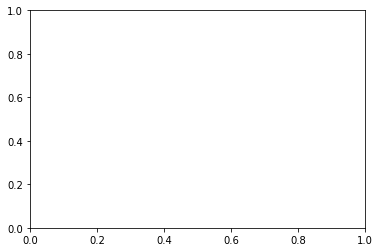

In [16]:
# now with fixed mnu

# call subplot with just one plot
fig, ax = plt.subplots()  
fact_axis = 2.3
#fact_axis2= 60
#plot_2s = True
plot_2s = False
#fishermat = fishermat_nln
fishermat = [Fij_gold_nln_k2_nmn,Fij_opti_nln_k2_nmn] # nln k2 _nmn
paramIndex1 = 6; label1 = 'w0'
paramIndex2 = 7; label2 = 'wa'

plot_fisher_two(paramIndex1,label1,paramIndex2,label2,paramVals2,fishermat,ax,fc,lw,ls,lc,fact_axis,fact_axis,
                    plot_2s=plot_2s, units=['',''],FS=16)
plt.plot(tony_data[:,0],tony_data[:,1],linewidth=2,color='r')
plt.show()